In [16]:
#import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

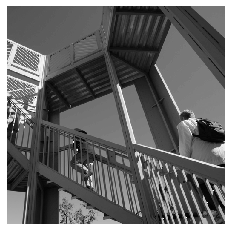

In [17]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [144]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [145]:
print(size_x, size_y)

512 512


In [146]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]] # edge detection
#filter = [[1, 0, -1], [0, 0, 0], [-1, 0, 1]] # edge
#filter = [[0, -1, 0], [-1, 5, -1], [0, -1, 0]] # sharpen
#filter = [[0.111, 0.111, 0.111], [0.111, 0.111, 0.111],[0.111, 0.111, 0.111]] # box blur or mean
#filter = [[0, 0, 0], [0, 0, 1], [0, 0, 0]] # shift
#filter = [[-1, -1, 0],[-1, 0, 1],[0, 1, 1]] # emboss (3-D shadow)
#filter = [[0, 1, 2], [-1, 0, -1], [-2, -1, 0]] # 45 grades
#filter = [[2, 1, 0], [-1, 0, -1], [0, -1, -2]] # 45 grades

# A couple more filters to try for fun!
#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
#filter = [[0, 0, 0], [0, 1, 0], [0, 0, 0]] # same image
#filter = [[0, 0.2, 0], [0.2, 0.2, 0.2], [0, 0.2, 0]] # blur
#filter = [[1, 2, 1], [2, 4, 2], [1, 2, 1]] # gauss blur with sum 16 and weight 0.0625
#filter = [[0.077847, 0.123317, 0.077847], [0.123317, 0.195346, 0.123317],  [0.077847, 0.123317, 0.077847]] # gauss norm.
#filter = [[1, 0, 0], [0, 1, 0], [0, 0, 1]] # motion blur weight=0.33
#filter = [[-0.5, 0, 0.5], [-0.5, 0, 0,5], [-0.5, 0, 0.5]] # horizontal
#filter = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]] # vertical

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 0.5

In [147]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

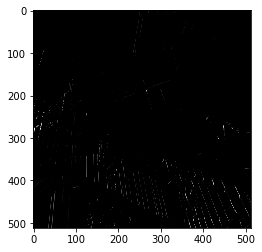

In [148]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

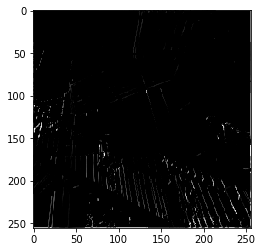

In [149]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()      